# 5.3 Improving model fit

- To get perfect fit, we must first overfit.
- First goal: *get a model that shows some generalization and is able to overfit*.

Three common problems we might encounter:
- Training doesn't start.
- Model doesn't generalize (can't beat common-sense baselines).
- Model doesn't seem to overfit: still underfitting.

## 5.3.1 Tuning key gradient descent parameters

- When training doesn't get started, you can overcome this problem.
- It's always a problem with the config. of the GD process: optimizer, initial values of weights, learning rate, or batch size.
- All these parameters are interdependent, and usually sufficient to tune the learning rate and the batch size while keeping the rest of the params constant.

Example on MNIST:

Start with a HUGE learning rate of 1:

In [4]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 784))
train_images = train_images.astype("float32") / 255

In [5]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.4689 - loss: 3176.7026 - val_accuracy: 0.1968 - val_loss: 2.4825
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.2441 - loss: 3.6382 - val_accuracy: 0.2298 - val_loss: 2.1621
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.2153 - loss: 2.8321 - val_accuracy: 0.2466 - val_loss: 2.5299
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.2206 - loss: 2.5193 - val_accuracy: 0.2261 - val_loss: 5.3299
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.2334 - loss: 2.5489 - val_accuracy: 0.2424 - val_loss: 2.1505
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.2402 - loss: 2.4813 - val_accuracy: 0.1705 - val_loss: 2.2021
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.2176 - loss: 2.2485 - val_accuracy: 0.2679 - val_loss: 1.9405
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.2610 - loss: 2.3869 - val_a

Now with a lower learning rate of 1e-2:

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8310 - loss: 0.9784 - val_accuracy: 0.9517 - val_loss: 0.1687
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9640 - loss: 0.1262 - val_accuracy: 0.9500 - val_loss: 0.2089
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9745 - loss: 0.0931 - val_accuracy: 0.9680 - val_loss: 0.1480
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9799 - loss: 0.0742 - val_accuracy: 0.9645 - val_loss: 0.1979
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9843 - loss: 0.0614 - val_accuracy: 0.9692 - val_loss: 0.1636
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9858 - loss: 0.0538 - val_accuracy: 0.9721 - val_loss: 0.1783
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9883 - loss: 0.0440 - val_accuracy: 0.9726 - val_loss: 0.1842
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9884 - loss: 0.0434 - val_accu

Thus, if you find yourself in a similar situation, try:
- Lowering or increasing the learning rate
- Increasing the batch size. Batch with more samples leads to more informative and less noisy gradients.

Eventually, we'll find a config that gets the training started.

## 5.3.2 Leveraging better architecture priors

We have a model that fits, but our validation metrics aren't improving. What's going on?

Perhaps the *worst* machine learning situation we can find ourselves in → *something is fundamentally wrong with the approach*.

Tips:
1. Input data doesn't contain sufficient info. to predict targets.
2. Using the incorrect model architecture for the problem at hand.
3. Using the right model is essential to achieve generalization.


> Leverage the architecture priors.

4. Read up on the specific architecture's best practices (chances are you're not the first person trying to solve it).



## 5.3.3 Increasing model capacity

If your model fits, validation metrics are going down, and achieves some level of generalization, we're almost there.
  - Next step, getting your model to start overfitting.

Example: simple log. reg. on MNIST:

In [7]:
model = keras.Sequential([
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [8]:
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7374 - loss: 1.0342 - val_accuracy: 0.9057 - val_loss: 0.3580
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8987 - loss: 0.3693 - val_accuracy: 0.9152 - val_loss: 0.3073
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9106 - loss: 0.3192 - val_accuracy: 0.9177 - val_loss: 0.2931
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9160 - loss: 0.3045 - val_accuracy: 0.9214 - val_loss: 0.2837
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9176 - loss: 0.2937 - val_accuracy: 0.9218 - val_loss: 0.2775
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9189 - loss: 0.2869 - val_accuracy: 0.9237 - val_loss: 0.2751
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9205 - loss: 0.2848 - val_accuracy: 0.9250 - val_loss: 0.2721
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9232 - loss: 0.2790 - val_accuracy: 0.

Loss curves:

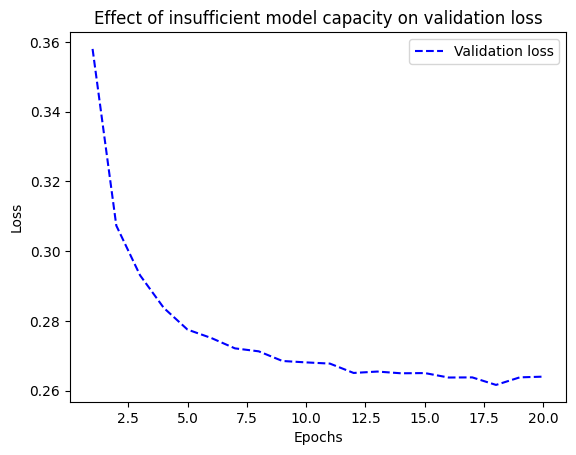

In [9]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

- Validation metrics stall (or improve very slowly), instead of peaking and reversing.
- Can fit, but clearly not overfit.
- Will enounter curves like this often.
- *It should always be possible to overfit*.

This issue too can be solved. If can't overfit, it's likely an issue with the ***representational power*** of the model:
- Need a bigger model
- With more capacity (able to store more info.)
- Do this by adding more layers, units, or different kind of layers (better architecture priors).

Let's modify the above model accordingly:

In [10]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [11]:
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8318 - loss: 0.6096 - val_accuracy: 0.9428 - val_loss: 0.1986
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9480 - loss: 0.1756 - val_accuracy: 0.9602 - val_loss: 0.1334
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9643 - loss: 0.1192 - val_accuracy: 0.9629 - val_loss: 0.1237
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9744 - loss: 0.0864 - val_accuracy: 0.9657 - val_loss: 0.1117
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9790 - loss: 0.0711 - val_accuracy: 0.9739 - val_loss: 0.0923
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9824 - loss: 0.0579 - val_accuracy: 0.9717 - val_loss: 0.0968
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9856 - loss: 0.0471 - val_accuracy: 0.9728 - val_loss: 0.0927
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9881 - loss: 0.0387 - val_accuracy: 0

Loss curve:

- Looks like it should: fits fast, and starts to overfit at ~8 epochs.

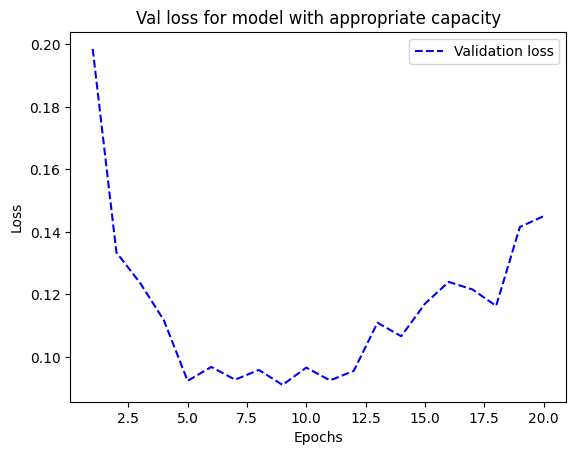

In [14]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Val loss for model with appropriate capacity")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()